# Assignment 1: Crabtree effect in $S. cerevisiae$

The Crabtree effect is an anomaly that occurs in various microbes, including the yeast Saccharomyces cerevisiae. In baker's yeast, it is characterized by cells using both oxidative and substrate level phosphorilation simultaneously to generate energy, in spite of having excess O2 at their disposal for full oxidative phosphorilation.

Von Meyerenburg (1969) did a study on this effect and his data is used as a base (or reference) case.

An exploritory analysis is done on the energy usage by yeast, while in the Crabtree metabolic regime.

The metaboic flux diagram of yeast is provided below.

<img src="Metabolism.png" width="500" />

Experimental data was obtained.

<img src="Experimental.png" width="800" />

Import all necessary libraries.

In [2]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

Determine $\beta$ from the $\alpha$ value given via a redox balance.

In [3]:
alpha = 0.1
def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.8 - 2*0.5 - 3*0.2) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]

List all known and assumed values and conditions.

In [4]:
D = np.array([0.05, 0.1, 0.15, 0.2, 0.243, 0.253, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45])
cX = np.array([13.66, 13.77, 13.89, 14.00, 14.09, 12.06, 9.50, 7.78, 6.78, 6.09, 5.52, 5.02, 4.62, 4.31, 4.04, 3.53])/24.6
theta = 0
rO2mass = np.array([2.1218, 3.5981, 5.0744, 6.5507, 7.820318, 7.921735, 7.41165, 6.81155, 6.21145, 5.61135, 5.01125, 4.41115, 3.81105, 3.21095, 2.61085, 2.01075]) #mm/g/h
rCO2mass = np.array([2.1218, 3.5981, 5.0744, 6.5507, 7.820318, 8.08734, 10.1916, 12.6672, 15.1428, 17.6184, 20.094, 22.5696, 25.0452, 27.5208, 29.9964, 32.472]) #mm/g/h
rO2 = rO2mass/1000*24.6 #mol/cmol X/h
rCO2 = rCO2mass/1000*24.6 #mol/cmol X/h

PO = 1.5

Set up metabolic flux model. Solve for the ATP produced ($\gamma$, as $\theta$ = 0) for each value of c$_X$ and D.

In [5]:
gammalist = []
thetalist = []
for i in range(0, len(D)):
    def energy(var):
        gamma = var
        mu = D[i]
        S = np.matrix([[-1, 1 + alpha, 1,   1,    0,    0,   0],
                       [0,  0,         0,   -1,   1,    3/2, 0],
                       [0,  beta,      2,   0,    -1/3, 0,   -2],
                       [0,  -gamma,    2/3, -1/3, 0,    1,   2*PO],
                       [0,  1,         0,   0,    0,    0,   0],
                       [0,  0,         0,   0,    0,    0,   1],
                       [0,  alpha,     1,   0,    0,    1/2, 0]])

        C = np.array([0, 0, 0, theta, mu, rO2[i], rCO2[i]]).T
        r = np.linalg.solve(S, C) 

        rXS = r[0]
        rXX = mu
        rXG = r[4]
        rXE = r[5]
        rXCO2 = alpha*r[1] + r[2] + 1/2*r[5]
        rXO2 = r[6]
        
        rVX = rXX*cX[i]
        rVS = rXS*cX[i]
        rVO = rXO2*cX[i]
        rVSresp = rVO
        rVATP1 = 3.5*rVSresp
        rVSferm = rVS - rVSresp
        rVATP2 = 1/3*rVSferm
        rVATP = rVATP1 + rVATP2

        nul1 = gamma - rVATP/rVX
        return nul1
    opl = fsolve(energy, 1.8)
    gamma = opl[0]
    gammalist.append(gamma)

Plot the volumetric ATP production vs. time.

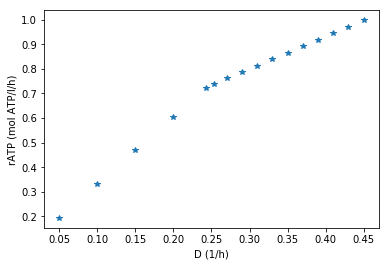

In [6]:
gammalist = np.array(gammalist)

plt.figure(0)
plt.xlabel('D (1/h)')
plt.ylabel('rATP (mol ATP/l/h)')
plt.plot(D, gammalist*D, '*')
plt.savefig('rVATP vs D.png', dpi = 300)
plt.show()

Plot the biomass based ATP production vs. time.

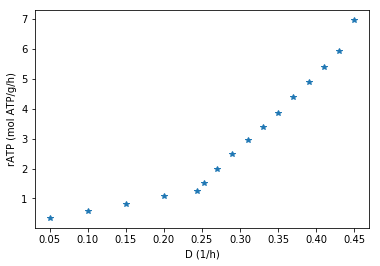

In [8]:
plt.figure(0)
plt.xlabel('D (1/h)')
plt.ylabel('rATP (mol ATP/g/h)')
plt.plot(D, gammalist*D/cX, '*')
plt.savefig('rXATP vs D.png', dpi = 300)
plt.show()

A distinct regime change was observed regarding the energy metabolism. More data sets will be obtained, analysed and discussed in Assignment 4.